In [13]:
import numpy as np
import h5py
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import mne
mat = scipy.io.loadmat('auditory_visual_audiovisual/audiovisual/s3_AV_test.dat_1.mat')

In [14]:
data = mat['allTARGETS'].transpose((0, 2, 1))

In [15]:
electrodes_l = np.concatenate(mat['electrodes'])
electrodes_l = [str(x).replace('[','').replace(']','').replace("'",'') for x in electrodes_l]
electrodes_l

['Cz',
 'CPz',
 'POz',
 'Pz',
 'P1',
 'P2',
 'C3',
 'C4',
 'O1',
 'O2',
 'T7',
 'T8',
 'P3',
 'P4',
 'F3',
 'F4']

In [16]:
ch_types = ['eeg'] * 16
info = mne.create_info(electrodes_l, ch_types=ch_types, sfreq=512)
info.set_montage('standard_1020')

epochs = mne.EpochsArray(data, info, tmin=-0.2)
evoked = epochs.average()

Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [19]:
epochs.plot()

Using qt as 2D backend.
Opening epochs-browser...
Using pyopengl with version 3.1.6


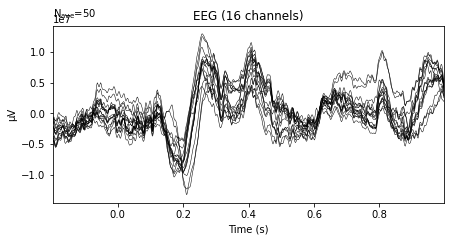

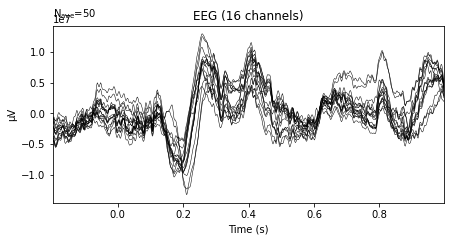

In [23]:
evoked.plot()

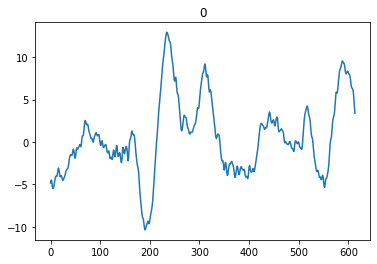

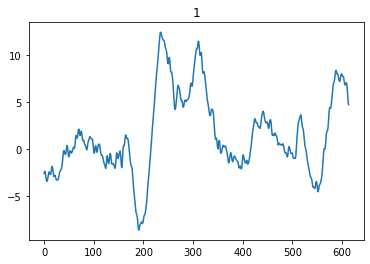

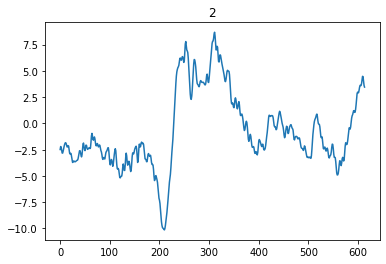

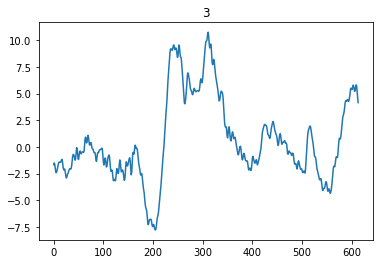

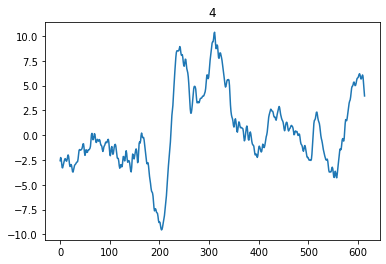

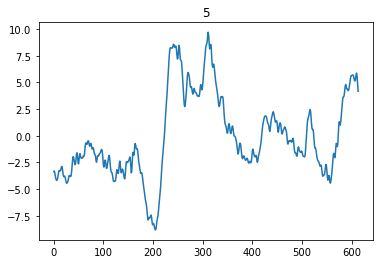

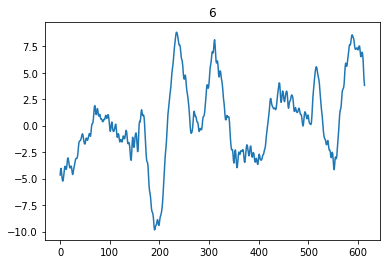

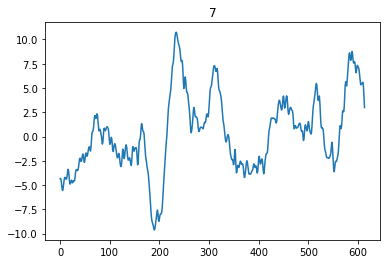

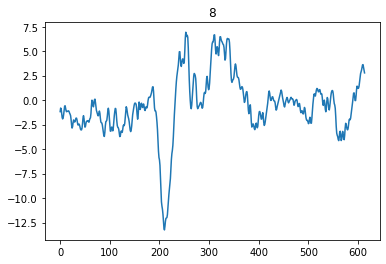

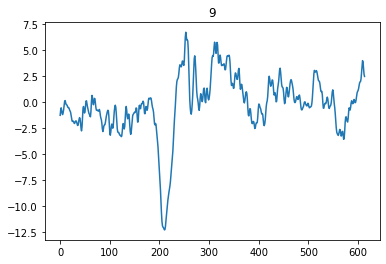

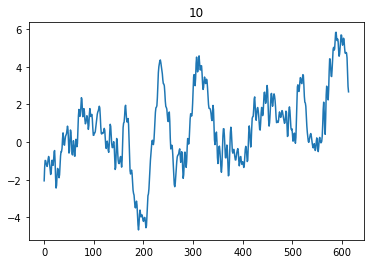

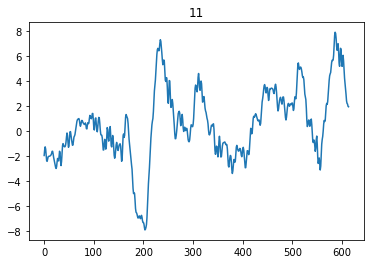

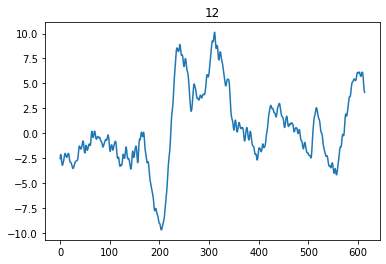

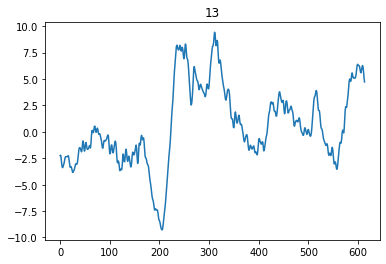

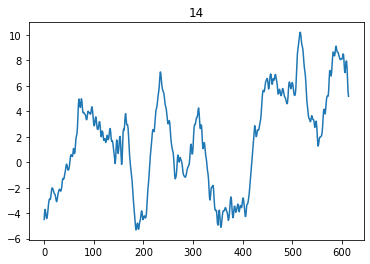

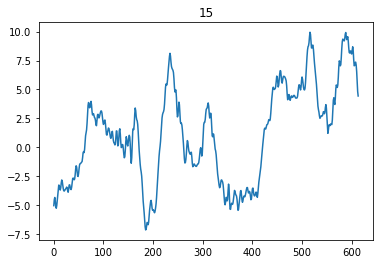

In [17]:
for i,n in enumerate(evoked.get_data()):
    fig = plt.figure()
    plt.plot(n)
    plt.title(str(i))